In [1]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Mounted at /content/gdrive
/content


In [2]:
%cd "/content/gdrive/MyDrive/AI/Décimo/Reto Mod2/Birds"
!ls  # show current directory

/content/gdrive/MyDrive/AI/Décimo/Reto Mod2/Birds
bird525.keras  birds.keras  birds_model.h5  test  train  valid


In [3]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [4]:
# Se definen los directorios para cada dataset
train_dir ='/content/gdrive/MyDrive/AI/Décimo/Reto Mod2/Birds/train'
test_dir ='/content/gdrive/MyDrive/AI/Décimo/Reto Mod2/Birds/test'
valid_dir ='/content/gdrive/MyDrive/AI/Décimo/Reto Mod2/Birds/valid'

# Conjuntos de datos de imágenes
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32)

valid_dataset = image_dataset_from_directory(
    valid_dir,
    image_size=(224, 224),
    batch_size=32)

# Tamaño de imagen y tamaño de lote
image_size = (224, 224)
batch_size = 32

Found 3227 files belonging to 20 classes.
Found 100 files belonging to 20 classes.
Found 100 files belonging to 20 classes.


In [5]:
# Obtención los nombres de las clases del conjunto de datos de entrenamiento
class_names = train_dataset.class_names
np.shape(class_names)

(20,)

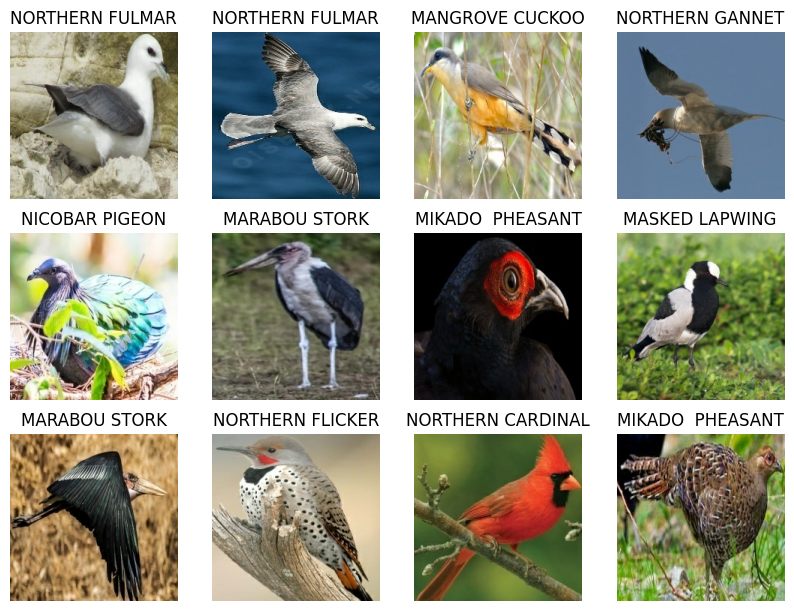

In [6]:
# Visualización de algunas imágenes del conjunto de datos de entrenamiento
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
      for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
# Definición de la secuencia de aumento de datos para diversificar el conjunto de datos de entrenamiento
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)

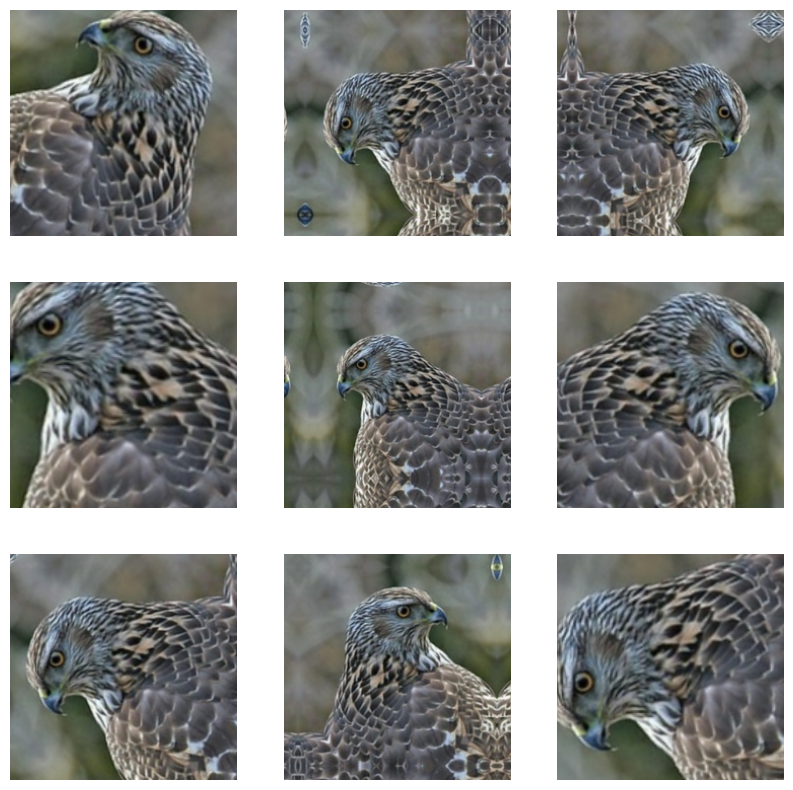

In [8]:
# Visualización de las imágenes transformadas
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [14]:
# Definición del tamaño de imagen
img_size = (224, 224)

# Modelo CNN con Keras
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.6)(x)
x = layers.Flatten()(x)

outputs = layers.Dense(20, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
# Información del modelo
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 batch_normalization_5 (Bat  (None, 224, 224, 3)       12        
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 111, 111, 32)      128 

In [18]:
# Compilación del modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Definición de los callbacks para guardar el mejor modelo durante el entrenamiento
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="birds.keras",
        save_best_only=True,
        monitor="val_loss")]

In [20]:
# Entrenamiento del modelo
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data = valid_dataset,
    callbacks=callbacks
)

Epoch 1/25
101/101 [==============================] - 808s 8s/step - loss: 3.1040 - accuracy: 0.2058 - val_loss: 4.1698 - val_accuracy: 0.0500
Epoch 2/25
101/101 [==============================] - 493s 5s/step - loss: 2.5360 - accuracy: 0.3006 - val_loss: 3.2944 - val_accuracy: 0.1100
Epoch 3/25
101/101 [==============================] - 496s 5s/step - loss: 2.0400 - accuracy: 0.3936 - val_loss: 3.2036 - val_accuracy: 0.1600
Epoch 4/25
101/101 [==============================] - 490s 5s/step - loss: 1.7246 - accuracy: 0.4537 - val_loss: 2.0121 - val_accuracy: 0.3600
Epoch 5/25
101/101 [==============================] - 500s 5s/step - loss: 1.5723 - accuracy: 0.5132 - val_loss: 1.4416 - val_accuracy: 0.5500
Epoch 6/25
101/101 [==============================] - 493s 5s/step - loss: 1.3813 - accuracy: 0.5686 - val_loss: 1.4253 - val_accuracy: 0.5100
Epoch 7/25
101/101 [==============================] - 490s 5s/step - loss: 1.2999 - accuracy: 0.5953 - val_loss: 1.1097 - val_accuracy: 0.6600

In [21]:
# Se guarda el modelo
model.save('birds_model.h5')
model.save('birds.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# Se carga el mejor modelo para probarlo con el dataset de test
test_model = keras.models.load_model("birds.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 29s 805ms/step - loss: 0.6475 - accuracy: 0.8500
Test accuracy: 0.850


In [ ]:
# Se realizan predicciones sobre el conjunto de datos de prueba utilizando el modelo entrenado
pred = model.predict(test_dataset)
pred

In [ ]:
# Clase predicha para la primera imagen en el conjunto de datos de prueba
np.argmax(pred[0])

In [25]:
# Función para mostrar los resultados de la predicción
def results(filename, class_names):
    img = load_img(filename, target_size=(224, 224))
    imgconv = img_to_array(img)
    img_array = np.expand_dims(imgconv, axis=0)
    pred = np.argmax(model.predict(img_array))
    predimg = class_names[pred]
    predver = np.max(model.predict(img_array))
    print(pred)
    plt.figure()
    plt.imshow(img)
    plt.title("Eto: {}, veroyatnost : {}".format(predimg, predver))
    plt.show()

1/1 [==============================] - 0s 59ms/step
11


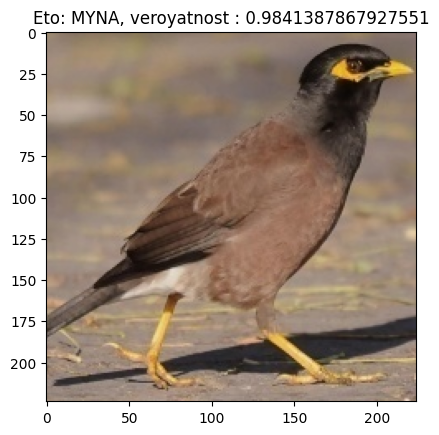

In [26]:
results('/content/gdrive/MyDrive/AI/Décimo/Reto Mod2/Birds/test/MYNA/1.jpg', class_names)

In [27]:
# Se guarda el modelo
model.save('birds_model.h5')
model.save('birds.keras')

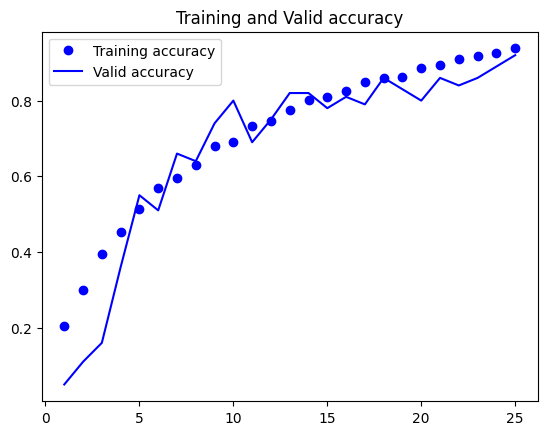

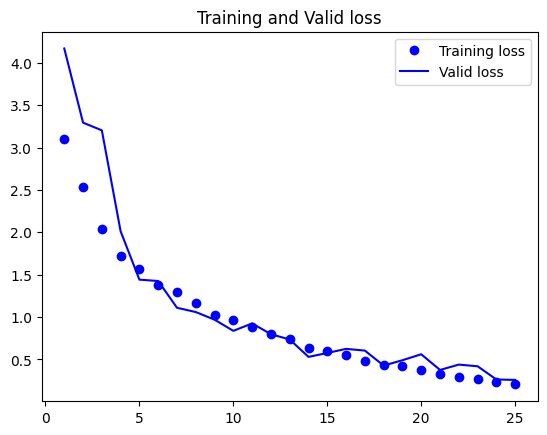

In [28]:
# Evaluación del modelo del dataset de validación
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Graficación de los resultados
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()

plt.show()